# JSON Mini-Project Objectives
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In question 2 above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

# import Pandas, JSON
+ We import pandas and json to read our data and build a dateframe. We also use pyplot to vizualize our data through graphs

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# Load JSON file as a string
+ We load our data and notice that this not very human-readable so we will attempt to visualize the data in other ways.

In [2]:
data = json.load(open('data/world_bank_projects.json'))
data[0]

{'sector': [{'Name': 'Primary education'},
  {'Name': 'Secondary education'},
  {'Name': 'Public administration- Other social services'},
  {'Name': 'Tertiary education'}],
 'supplementprojectflg': 'N',
 'projectfinancialtype': 'IDA',
 'prodline': 'PE',
 'mjtheme': ['Human development'],
 'idacommamt': 130000000,
 'impagency': 'MINISTRY OF EDUCATION',
 'project_name': 'Ethiopia General Education Quality Improvement Project II',
 'mjthemecode': '8,11',
 'closingdate': '2018-07-07T00:00:00Z',
 'totalcommamt': 130000000,
 'id': 'P129828',
 'mjsector_namecode': [{'code': 'EX', 'name': 'Education'},
  {'code': 'EX', 'name': 'Education'},
  {'code': 'BX', 'name': 'Public Administration, Law, and Justice'},
  {'code': 'EX', 'name': 'Education'}],
 'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
 'sector1': {'Percent': 46, 'Name': 'Primary education'},
 'lendinginstr': 'Investment Project Financing',
 'countrycode': 'ET',
 'sector2': {'Percent': 26

# Load JSON file as a dataframe
+ We can now see that each row of the dataframe represents a different project and the columns are the various features.

In [3]:
world_bank = pd.read_json('data/world_bank_projects.json')
world_bank.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


# Inspecting the data
+ We notice that the data has no missing values for the countryname and countryshortname columns so we can use them to find the total number of projects per country.

In [4]:
world_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

# Pivot the Dataframe
+ We pivot the dataframe and set the index to be each country that appears in the data and the values to be the number of times that country appears. Notice that the column 'countryname' is mislabeled. We can also see that some rows are not associated with a specific country as seen by the 'World' index entry.

In [5]:

most_projects = pd.pivot_table(world_bank,values = 'countryname', index = 'countryshortname', aggfunc = 'count')
most_projects.tail(10)

,countryname
countryshortname,
Ukraine,4
Uruguay,3
Uzbekistan,5
Vanuatu,3
Vietnam,17
West Bank and Gaza,6
World,2
"Yemen, Republic of",13
Zambia,4


# Relabel and Sort Dataframe
+ Sorting by Project Count in descending order gives us the top 10 countries with the most projects. We also relabel our index and values column for clarity.

In [6]:
most_projects.rename(columns={'countryname':'Project Count'}, inplace = True)
most_projects.index.names = ['Country']
most_projects.sort_values('Project Count', ascending = False, inplace = True)
most_projects.head(10)

,Project Count
Country,
China,19
Indonesia,19
Vietnam,17
India,16
"Yemen, Republic of",13
Nepal,12
Bangladesh,12
Morocco,12
Mozambique,11


# Africa is not a country
+ Therefore we will have to search for more than the first 10 entries of the sorted dataframe.

In [7]:
top_10 = most_projects.iloc[:13]
top_10 = top_10.drop('Africa')
top_10


,Project Count
Country,
China,19
Indonesia,19
Vietnam,17
India,16
"Yemen, Republic of",13
Nepal,12
Bangladesh,12
Morocco,12
Mozambique,11


# Countries with the most projects
+ __China, Indonesia, Vietnam, India, Yemen, Nepal, Bangladesh, Morocco, Mozambique and a three way tie between Pakistan, Brazil, Burkina Faso__ 
+ We visualize our dataframe with a basic pyplot graph and see that more than 80 countries have 4 or less projects.

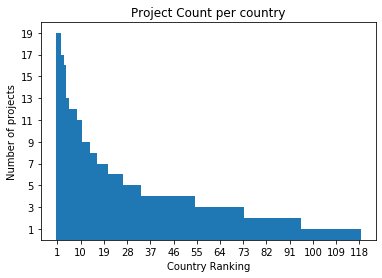

In [8]:
plt.bar(range(1,119), most_projects['Project Count'], width = 1)
plt.title('Project Count per country')
plt.xlabel('Country Ranking')
plt.ylabel('Number of projects')
plt.xticks(range(1,119,9), range(1,119,9))
plt.yticks(range(1,20,2), range(1,20,2))
plt.show()

# Build a dictionary that maps unique theme code to theme name
+ While we are going through the data we can also find out what name entries are missing.

In [9]:
code_to_theme = {}
missing_names = 0
for project in world_bank.mjtheme_namecode:
    for entry in project:
        if entry['code'] not in code_to_theme.keys():
            if entry['name'] != '':
                code_to_theme[entry['code']] = entry['name']
        if entry['name'] == '':
            missing_names += 1
            
code_to_theme


{'8': 'Human development',
 '1': 'Economic management',
 '6': 'Social protection and risk management',
 '5': 'Trade and integration',
 '2': 'Public sector governance',
 '11': 'Environment and natural resources management',
 '7': 'Social dev/gender/inclusion',
 '4': 'Financial and private sector development',
 '10': 'Rural development',
 '9': 'Urban development',
 '3': 'Rule of law'}

# How many names are missing?

In [10]:
'There are %i missing theme names' % missing_names 

'There are 122 missing theme names'

# Filling the missing entries

In [14]:
for project in world_bank.mjtheme_namecode:
    for entry in project:
        if entry['name'] == '':
            entry['name'] = code_to_theme[entry['code']]
            missing_names -= 1

world_bank.mjtheme_namecode.head(10)

0    [{'code': '8', 'name': 'Human development'}, {...
1    [{'code': '1', 'name': 'Economic management'},...
2    [{'code': '5', 'name': 'Trade and integration'...
3    [{'code': '7', 'name': 'Social dev/gender/incl...
4    [{'code': '5', 'name': 'Trade and integration'...
5    [{'code': '6', 'name': 'Social protection and ...
6    [{'code': '2', 'name': 'Public sector governan...
7    [{'code': '11', 'name': 'Environment and natur...
8    [{'code': '10', 'name': 'Rural development'}, ...
9    [{'code': '2', 'name': 'Public sector governan...
Name: mjtheme_namecode, dtype: object

In [ ]:
'There are %i missing theme names' % missing_names 

# Build Themes DataFrame
            

In [ ]:
theme_names = []
for project in world_bank.mjtheme_namecode:
    for entry in project:
        theme_names.append(entry['name'])
        
theme_df = pd.DataFrame(data = theme_names, columns = ['Theme'])
theme_df['Count'] = 0
theme_df = theme_df.groupby('Theme').count()
theme_df.sort_values('Count', ascending = False)

# Most Common Themes

+ __Environment and natural resources management, Rural development, Human development Public sector governance, Social protection and risk management, Financial and private sector development, Social dev/gender/inclusion, Trade and integration, Urban development, Economic management__

+ There were a total of 11 themes so Rule of Law was the only theme to not make the top 10

